In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
pd.set_option('display.max_columns', None)

In [144]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8,360.333333
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38,552.500000
2,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49,292.500000
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174,665.000000
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0,0,1,0,0,0,159,266.000000


In [145]:
print(df.isnull().sum())

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64


#### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

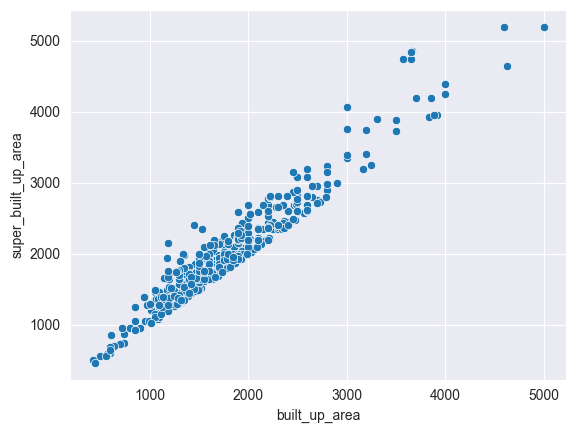

In [146]:
sns.scatterplot(x=df['built_up_area'], y=df['super_built_up_area'])

strong correlation

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

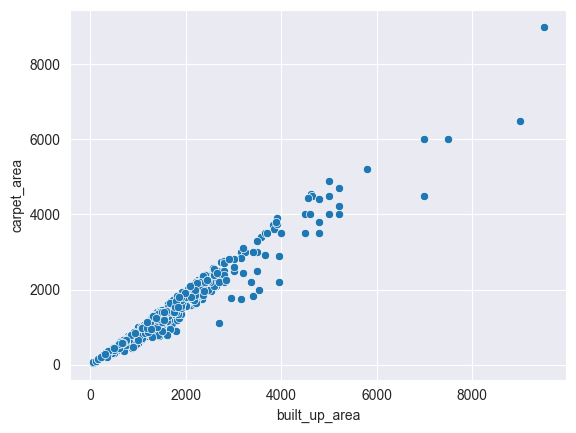

In [147]:
sns.scatterplot(x=df['built_up_area'], y=df['carpet_area'])

In [148]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())).sum()

0

There are 0 rows with all three missing values 

In [149]:
all_present_df = df[
    ~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [150]:
all_present_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174,665.000000
16,flat,ss the leaf,sector 85,1.09,6667.0,1635.0,Super Built up area 1640(152.36 sq.m.)Built Up...,2,2,3,9.0,South-West,Relatively New,1640.0,1638.0,1635.0,0,0,1,0,0,0,174,817.500000
17,flat,capital residences 360,sector 70a,1.15,11500.0,1000.0,Super Built up area 1450(134.71 sq.m.)Built Up...,2,2,3,4.0,East,New Property,1450.0,1400.0,1000.0,0,0,0,1,0,0,132,500.000000
32,flat,emaar mgf the palm drive,sector 66,3.50,15909.0,2200.0,Super Built up area 2200(204.39 sq.m.)Built Up...,3,3,3,7.0,North-East,Moderately Old,2200.0,2125.0,2000.0,0,1,1,0,0,1,149,733.333333
34,flat,dlf the skycourt,sector 86,1.54,9222.0,1670.0,Super Built up area 1929(179.21 sq.m.)Built Up...,3,3,3+,15.0,North-West,Relatively New,1929.0,1780.0,1670.0,0,1,0,0,0,0,174,556.666667


In [151]:
all_present_df.shape

(531, 24)

In [152]:
super_to_built_up_ratio = (all_present_df['super_built_up_area'] / all_present_df['built_up_area']).median()
career_to_built_up_ratio = (all_present_df['carpet_area'] / all_present_df['built_up_area']).median()

print(super_to_built_up_ratio, career_to_built_up_ratio)

1.105263157894737 0.9


In [153]:
# Both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8,360.333333
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0,0,1,0,0,0,159,266.000000
38,flat,corona optus,sector 37,1.25,7176.0,1742.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3,3,3,2.0,North-West,Relatively New,1735.0,NaN,1400.0,1,0,0,0,0,0,49,580.666667
40,flat,m3m merlin,sector 67,2.80,13679.0,2047.0,Super Built up area 2047(190.17 sq.m.)Carpet a...,3,3,3,5.0,North-East,Moderately Old,2047.0,NaN,1880.0,0,1,0,0,0,2,26,682.333333
45,flat,smart world orchard,sector 61,2.10,13752.0,1527.0,Super Built up area 1549(143.91 sq.m.)Carpet a...,3,2,3,3.0,South,Under Construction,1549.0,NaN,1500.0,0,0,0,0,0,0,146,509.000000


In [154]:
sbc_df.shape

(421, 24)

In [155]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area'] / 1.105) + (sbc_df['carpet_area'] / 0.9)) / 2),
                               inplace=True)

C:\Users\15105\AppData\Local\Temp\ipykernel_34348\3172895011.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area'] / 1.105) + (sbc_df['carpet_area'] / 0.9)) / 2),
C:\Users\15105\AppData\Local\Temp\ipykernel_34348\3172895011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb

In [156]:
df.update(sbc_df)

In [157]:
df.isnull().sum().sort_values(ascending=False)

carpet_area            1715
super_built_up_area    1680
built_up_area          1547
facing                 1011
floorNum                 17
society                   1
property_type             0
luxury_score              0
furnishing_type           0
others                    0
pooja room                0
store room                0
servant room              0
study room                0
agePossession             0
balcony                   0
bathroom                  0
bedRoom                   0
areaWithType              0
area                      0
price_per_sqft            0
price                     0
sector                    0
area_room_ratio           0
dtype: int64

In [158]:
# sb present c is null built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
5,flat,paras quartier,gwal pahari,7.50,14019.0,5350.0,Super Built up area 5350(497.03 sq.m.),4,4,3+,20.0,North-East,New Property,5350.0,NaN,NaN,0,1,0,1,1,1,49,1337.500000
6,flat,experion the heartsong,sector 108,2.00,8554.0,2338.0,Super Built up area 2338(217.21 sq.m.),3,3,3+,14.0,East,Relatively New,2338.0,NaN,NaN,0,1,0,0,0,0,95,779.333333
7,flat,adani m2k oyster grande,sector 102,1.90,9104.0,2087.0,Super Built up area 1889(175.49 sq.m.),3,4,3,8.0,North-East,Relatively New,1889.0,NaN,NaN,0,1,0,0,0,0,165,695.666667
12,flat,ats tourmaline,sector 109,2.25,8704.0,2585.0,Super Built up area 2585(240.15 sq.m.),3,4,3,14.0,North-East,Relatively New,2585.0,NaN,NaN,0,1,0,0,0,0,101,861.666667
15,flat,bestech park view sanskruti,sector 92,1.55,7568.0,2048.0,Super Built up area 1995(185.34 sq.m.),3,4,3,16.0,South,Relatively New,1995.0,NaN,NaN,0,1,0,0,0,1,60,682.666667


In [159]:
sbc_df.shape

(875, 24)

In [160]:
sbc_df['built_up_area'].fillna(round(sbc_df['super_built_up_area'] / 1.105), inplace=True)
df.update(sbc_df)

C:\Users\15105\AppData\Local\Temp\ipykernel_34348\4230052799.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(sbc_df['super_built_up_area'] / 1.105), inplace=True)
C:\Users\15105\AppData\Local\Temp\ipykernel_34348\4230052799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fill

In [161]:
df.isnull().sum().sort_values(ascending=False)

carpet_area            1715
super_built_up_area    1680
facing                 1011
built_up_area           672
floorNum                 17
society                   1
property_type             0
luxury_score              0
furnishing_type           0
others                    0
pooja room                0
store room                0
servant room              0
study room                0
agePossession             0
balcony                   0
bathroom                  0
bedRoom                   0
areaWithType              0
area                      0
price_per_sqft            0
price                     0
sector                    0
area_room_ratio           0
dtype: int64

In [162]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38,552.50
11,flat,dlf regency park,sector 28,1.60,14545.0,1100.0,Carpet area: 1100 (102.19 sq.m.),2,2,2,3.0,North,Relatively New,NaN,NaN,1100.0,0,0,0,0,0,0,52,550.00
13,flat,emaar mgf emerald floors premier,sector 65,2.77,14025.0,1975.0,Carpet area: 1975 (183.48 sq.m.),4,4,3+,3.0,North-East,Relatively New,NaN,NaN,1975.0,1,1,0,0,0,2,174,493.75
19,flat,afnhb jalvayu vihar,sector 30,0.85,12859.0,661.0,Carpet area: 661 (61.41 sq.m.),2,2,1,2.0,West,Old Property,NaN,NaN,661.0,0,0,0,0,1,1,49,330.50
25,flat,chanderlok society,sector 28,0.90,7235.0,1244.0,Carpet area: 1244 (115.57 sq.m.),4,2,3+,1.0,NaN,Old Property,NaN,NaN,1244.0,0,0,0,0,0,0,0,311.00


In [163]:
c_df['built_up_area'].fillna(round(c_df['carpet_area'] / 0.9), inplace=True)
df.update(c_df)

C:\Users\15105\AppData\Local\Temp\ipykernel_34348\740796799.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area'] / 0.9), inplace=True)
C:\Users\15105\AppData\Local\Temp\ipykernel_34348\740796799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['car

In [164]:
df.isnull().sum().sort_values(ascending=False)

carpet_area            1715
super_built_up_area    1680
facing                 1011
floorNum                 17
society                   1
property_type             0
built_up_area             0
luxury_score              0
furnishing_type           0
others                    0
pooja room                0
store room                0
servant room              0
study room                0
agePossession             0
balcony                   0
bathroom                  0
bedRoom                   0
areaWithType              0
area                      0
price_per_sqft            0
price                     0
sector                    0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

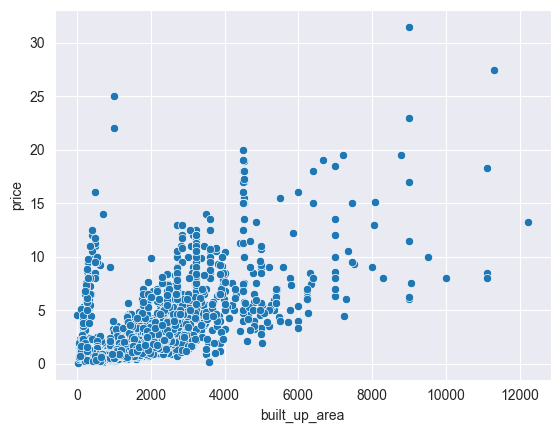

In [165]:
sns.scatterplot(x=df['built_up_area'], y=df['price'])

As we can see there are few anomalies here where the built up area is very less and its price is very high

In [166]:
anomaly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price', 'area', 'built_up_area']]

In [167]:
anomaly_df.sample(5)

,price,area,built_up_area
353,2.55,1935.0,215.0
2042,2.55,1557.0,1557.0
1036,4.45,1265.0,150.0
987,5.70,2430.0,270.0
2832,6.50,2332.0,299.0


In [168]:
anomaly_df['built_up_area'] = anomaly_df['area']
df.update(anomaly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

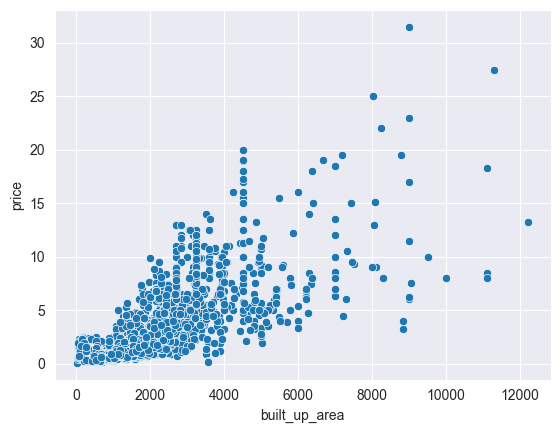

In [169]:
sns.scatterplot(x=df['built_up_area'], y=df['price'])

In [170]:
df.drop(columns=['area', 'areaWithType', 'super_built_up_area', 'carpet_area', 'area_room_ratio'], inplace=True)
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3,2,2,2.0,NaN,New Property,850.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8597.0,2,2,2,4.0,NaN,New Property,1226.0,1,1,0,0,0,0,38
2,flat,breez global hill view,sohna road,0.32,5470.0,2,2,1,17.0,NaN,New Property,1000.0,0,0,0,0,0,0,49
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3,4,3+,10.0,North-West,Relatively New,1615.0,0,1,0,0,1,1,174
4,flat,suncity avenue,sector 102,0.48,9023.0,2,2,1,5.0,North-East,Relatively New,582.0,0,0,1,0,0,0,159


In [171]:
df.isnull().sum().sort_values(ascending=False)

facing             1011
floorNum             17
society               1
built_up_area         0
furnishing_type       0
others                0
pooja room            0
store room            0
servant room          0
study room            0
property_type         0
agePossession         0
balcony               0
bathroom              0
bedRoom               0
price_per_sqft        0
price                 0
sector                0
luxury_score          0
dtype: int64

#### floorNum

In [172]:
print(df[df['floorNum'].isnull()])

     property_type                  society             sector  price  \
500          house              independent           sector 4   0.65   
767          house              independent           sector 7   6.50   
1294         house              independent           sector 3   1.50   
1452         house       vipul tatvam villa          sector 48   8.50   
1465         house  ansal sushant lok plots          sector 43   3.30   
1946         house               jacob pura          sector 12   0.35   
2048         house       vipul tatvam villa          sector 48   8.50   
2157         house              independent           sector 4   4.12   
2271         house       emaar mgf marbella          sector 66   9.00   
2439         house     dlf new town heights          sector 86   2.47   
2536          flat                      NaN          sector 78   0.60   
2545         house        ansal sushant lok          sector 43  10.50   
2918         house              independent        

In [173]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [174]:
df['floorNum'].fillna(2.0, inplace=True)

C:\Users\15105\AppData\Local\Temp\ipykernel_34348\1880809499.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0, inplace=True)


In [175]:
df.isnull().sum().sort_values(ascending=False)

facing             1011
society               1
agePossession         0
furnishing_type       0
others                0
pooja room            0
store room            0
servant room          0
study room            0
built_up_area         0
property_type         0
floorNum              0
balcony               0
bathroom              0
bedRoom               0
price_per_sqft        0
price                 0
sector                0
luxury_score          0
dtype: int64

#### facing

<Axes: ylabel='count'>

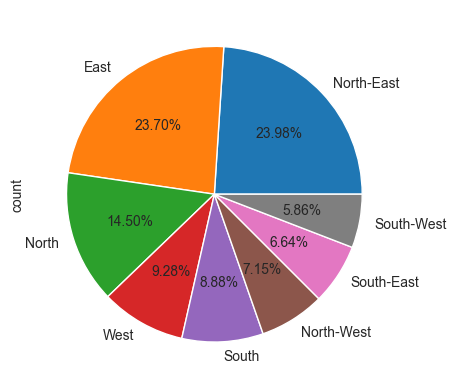

In [176]:
df['facing'].value_counts().plot(kind='pie', autopct='%0.2f%%')

In [177]:
df.shape

(3555, 19)

In [178]:
1011/df.shape[0]

0.2843881856540084

In [179]:
df.drop(columns=['facing'], inplace=True)

In [180]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1655,house,nirvana country,sector 50,10.00,14286.0,5,7,2,4.0,Moderately Old,7000.0,0,1,0,0,0,2,0
1879,flat,dlf the ultima,sector 81,2.50,11726.0,3,3,2,20.0,Relatively New,1700.0,0,1,0,0,0,2,174
1458,flat,espire south,sector 68,1.32,9047.0,2,2,2,9.0,New Property,1460.0,0,0,0,0,0,0,0
1347,flat,umang winter hills,sector 77,1.20,6586.0,3,3,3,14.0,Undefined,1822.0,0,0,0,0,0,0,46
1209,flat,sare crescent parc royal greens phase 1,sector 92,0.95,5008.0,4,5,3+,4.0,Moderately Old,1717.0,0,1,0,0,0,0,37


#### society

In [181]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2536,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [182]:
df.drop(index=[2536], inplace=True)

In [183]:
df.shape

(3554, 18)

#### agePossession

In [184]:
df['agePossession'].value_counts()

agePossession
Relatively New        1605
New Property           557
Moderately Old         545
Old Property           293
Undefined              291
Under Construction     263
Name: count, dtype: int64

In [185]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
10,house,independent,sector 109,1.55,6568.0,3,2,0,1.0,Undefined,2360.0,0,0,0,0,0,0,0
33,house,greenopolis,sector 89,0.70,5397.0,2,2,2,14.0,Undefined,1297.0,0,0,0,0,0,0,0
48,flat,smart world gems,sector 89,1.71,12000.0,3,2,0,3.0,Undefined,1423.0,0,0,0,0,0,0,45
70,flat,rof aalayas,sector 102,0.45,6000.0,1,1,2,6.0,Undefined,750.0,0,0,0,0,0,0,0
74,house,bhim garh kheri,sector 3,1.50,7576.0,7,2,0,1.0,Undefined,1980.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3497,flat,raheja vedaanta,sector 108,0.70,4522.0,2,2,3,1.0,Undefined,1548.0,0,0,0,0,0,0,0
3502,flat,signature global city,sector 37d,1.10,9839.0,2,2,2,4.0,Undefined,1242.0,0,0,0,0,0,0,59
3508,house,independent,sector 21,0.45,8411.0,3,2,1,1.0,Undefined,594.0,0,0,0,0,0,0,0
3520,flat,sidhartha ncr one,sector 95,0.57,4179.0,2,2,2,10.0,Undefined,1364.0,0,0,0,0,0,0,0


In [186]:
# we will ask all the sector and property_type of undefined rows and select its mode
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, else return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [187]:
mode_based_imputation((df[df['agePossession'] == 'Undefined']).iloc[1])

'Undefined'

In [188]:
mode_based_imputation(df[df['agePossession'] == 'New Property'].iloc[1])

'New Property'

In [189]:
df['agePossession'] = df.apply(mode_based_imputation, axis=1)

In [190]:
df['agePossession'].value_counts()

agePossession
Relatively New        1715
New Property           598
Moderately Old         585
Old Property           324
Under Construction     277
Undefined               55
Name: count, dtype: int64

Reduced to 55

In [191]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, else return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [192]:
df['agePossession'] = df.apply(mode_based_imputation2, axis=1)

In [193]:
df['agePossession'].value_counts()

agePossession
Relatively New        1730
New Property           599
Moderately Old         592
Old Property           327
Under Construction     277
Undefined               29
Name: count, dtype: int64

From 55 to 29

In [194]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, else return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [195]:
df['agePossession'] = df.apply(mode_based_imputation3, axis=1)

In [196]:
df['agePossession'].value_counts()

agePossession
Relatively New        1732
Moderately Old         619
New Property           599
Old Property           327
Under Construction     277
Name: count, dtype: int64

In [197]:
df.isnull().sum().sum()

0

In [198]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [199]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3,2,2,2.0,New Property,850.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8597.0,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38
2,flat,breez global hill view,sohna road,0.32,5470.0,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,0,49
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,1,174
4,flat,suncity avenue,sector 102,0.48,9023.0,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,0,159


In [200]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv', index=False)